In [ ]:
import cv2
from keras.models import load_model
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

#cv2_imshow(img)
print("\n")
#cv2_imshow(last_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
facenet_model = load_model('/content/facenet_keras.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
import numpy as np 
def get_embedding(image_path,model):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    face_detect = face_cascade.detectMultiScale(gray, 1.2, 4)
    for (x , y, w, h) in face_detect:
        face_img = img[y:y+h , x:x+w]
        last_img = cv2.resize(face_img , (160,160))
    # scale pixel values
    face = last_img.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
print("Total Params:", facenet_model.count_params())

Total Params: 22808144


In [ ]:
def triplet_loss(y_true, y_pred, alpha = 0.2):

    
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]

    # Step 1: Compute the (encoding) distance between the anchor and the positive
    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis = -1)
    # Step 2: Compute the (encoding) distance between the anchor and the negative, you will need to sum over axis=-1
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis = -1)
    # Step 3: subtract the two previous distances and add alpha.
    basic_loss = pos_dist - neg_dist + alpha
    # Step 4: Take the maximum of basic_loss and 0.0. Sum over the training examples.
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))
    
    return loss

In [ ]:
import tensorflow as tf

In [ ]:
facenet_model.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])

In [ ]:
database = {}
database["Anish"] = get_embedding("/content/Facebook_profile.JPG", facenet_model)
database["Aadarsh"] = get_embedding("/content/aadarsh.PNG", facenet_model)
database["Shraddha"] = get_embedding("/content/Shraddha.jpeg", facenet_model)
database["Sachin"] = get_embedding("/content/Sachin-Tendulkar.jpg", facenet_model)

In [ ]:
def verify(image_path, identity, database, model):

    
    ### START CODE HERE ###
    
    # Step 1: Compute the encoding for the image. Use img_to_encoding() see example above. (≈ 1 line)
    encoding = get_embedding(image_path, model)
    
    # Step 2: Compute distance with identity's image (≈ 1 line)
    dist = np.linalg.norm(encoding - database[identity])
    
    dist /= 10
    # Step 3: Open the door if dist < 0.7, else don't open (≈ 3 lines)
    if dist < 1.0:
        print("It's " + str(identity) + ", welcome in!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", please go away")
        door_open = False
        
    ### END CODE HERE ###
        
    return dist, door_open

In [ ]:
verify("/content/Facebook_profile.JPG", "Anish", database, facenet_model)

It's Anish, welcome in!


(0.0, True)

In [ ]:
#img = cv2.imread('/content/test_image.jpeg',3)
#cv2_imshow(img)

In [ ]:
def who_is_it(image_path, database, model):

    check_img = cv2.imread(image_path)
    check_img = cv2.resize(check_img , (160,160))
    ## Step 1: Compute the target "encoding" for the image. Use img_to_encoding() see example above. ## (≈ 1 line)
    encoding =get_embedding(image_path , model)
    
    ## Step 2: Find the closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 (≈1 line)
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        
        # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
        dist = np.linalg.norm(encoding - db_enc)
        dist /= 10
        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
        if dist < min_dist:
            min_dist = dist
            identity = name
    
    if min_dist > 1.1:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        cv2_imshow(check_img)
    
    return min_dist, identity

it's Shraddha, the distance is 1.0971861839294434


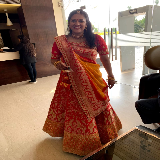

(1.0971861839294434, 'Shraddha')

In [ ]:
who_is_it("/content/test_shraddha.jpeg", database, facenet_model)